Fermín Huarte, Noviembre 2023
## Ajuste lineal: cinética de segundo orden

Como primer ejemplo consideramos la cinética de una reacción de segundo orden como la hidrólisis del acetato de etilo en medio básico:
$$
CH_3COO-CH_2CH_3 + OH^- \leftrightarrow CH_3COO^- + CH_3CH_2OH
$$
que sigue una ley cinética del tipo:
$$
v = \frac{-d[AcEt]}{dt} = k [AcEt][OH^-]
$$
Se puede comprobar que, en esta reacción, si preparamos concentraciones iniciales _identicamente iguales_ para ambos reactivos y dado que la estequimetría de la reacción es 1 a 1, las concentraciones de ambos reactivos serán iguales en todo momento y podemos escribir:
$$
v = \frac{-d[AcEt]}{dt} = k [AcEt]^2
$$
Esta _ley diferencial_ se puede integrar para obtener la ley integral:
$$
\frac{1}{[AcEt]} = \frac{1}{[AcEt]_0} + k t
$$

**Primer ejercicio**

Construir un programa que lea los ficheros (Numpy) `kinetics_conc.dat` (concentración del reactivo en mol l$^{-1}$) i `kinetics_time.dat`(tiempo de reacción en s) que *tenéis que descargar previamente*. A continuación debéis realizar una figura con dos paneles: 
- panel izquierdo: representar concentracion vs. tiempo
- panel derecho: representar 1/concentracion vs. tiempo

Dado que son resultados experimentales, los representaremos mediante símbolos, no lineas. Etiquetar correctamente ejes y gráficos

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
c = np.loadtxt("/Users/fermin/Library/CloudStorage/OneDrive-UniversitatdeBarcelona/20_PYTHON_MASTER/PYTHON_POSTGRAD/30_DATA/cinetica_conc.dat")

In [13]:
t = np.loadtxt("/Users/fermin/Library/CloudStorage/OneDrive-UniversitatdeBarcelona/20_PYTHON_MASTER/PYTHON_POSTGRAD/30_DATA/cinetica_temps.dat")

In [14]:
t.size == c.size

True

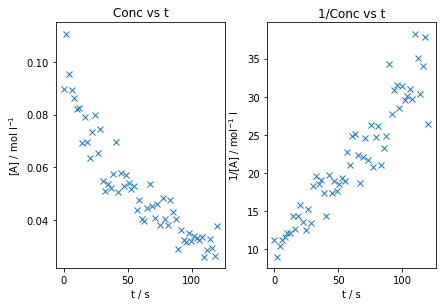

In [35]:
fig, (ax0, ax1) = plt.subplots(1,2)
plt.tight_layout()
ax0.plot(t,c,"x")
ax0.set_title("Conc vs t");
ax0.set_xlabel("t / s");
ax0.set_ylabel("[A] / mol l$^{-1}$");
ax1.plot(t,1/c,"x")
ax1.set_title("1/Conc vs t")         
ax1.set_xlabel("t / s");
ax1.set_ylabel("1/[A] / mol$^{-1}$ l");

**Segundo ejercicio**

- Usar la función `np.polyfit`(buscar documentación) para ajustar a una recta los datos de $\frac{1}{[A]} \; vs. \; t$.

- Escribir el calor de la constante cinética (pendiente de la recta)

- Evaluar la función ajustada para 30 valores equiespaciados de tiempo entre 0 i 120 segundos.

- Representar en una única figura $\frac{1}{[A]} \; vs. \; t$ para los datos experimentales (símbolos) y el ajuste (linea). Utilizar una leyenda para distinguir la información.


In [32]:
np.polyfit?

Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically. See
the documentation of the method for more information.

Parameters
----------
x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    poi

In [24]:
pars = np.polyfit(t,1/c,1)
A0 = 1/pars[1] #initial concentration
k = pars[0] #bimolecular kinetic rate

In [23]:
np.polyval?

Signature: np.polyval(p, x)
Docstring:
Evaluate a polynomial at specific values.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

If `p` is of length N, this function returns the value:

    ``p[0]*x**(N-1) + p[1]*x**(N-2) + ... + p[N-2]*x + p[N-1]``

If `x` is a sequence, then ``p(x)`` is returned for each element of ``x``.
If `x` is another polynomial then the composite polynomial ``p(x(t))``
is returned.

Parameters
----------
p : array_like or poly1d object
   1D array of polynomial coefficients (including coefficients equal
   to zero) from highest degree to the constant term, or an
   instance of poly1d.
x : array_like or poly1d object
   A number, an array of numbers, or an instance of poly1d, at
   which to evaluate `p`.

Returns
-------
values : ndarray or poly1d
   If

In [26]:
t_fit = np.linspace(0,120,20)
over_c_fit = np.polyval(pars,t_fit)

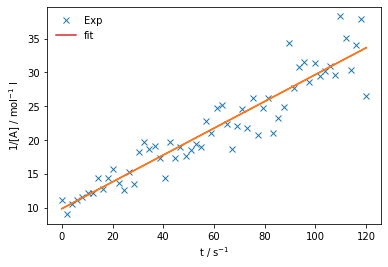

In [30]:
plt.plot(t,1/c,"x", label="Exp")
plt.plot(t_fit,over_c_fit,"C3-", label="fit")
plt.plot(t_fit, pars[1] + pars[0]*t_fit)
plt.xlabel("t / s$^{-1}$");
plt.ylabel("1/[A] / mol$^{-1}$ l");
plt.legend(frameon=False);

Fermín Huarte, Noviembre 2023
## Ajuste lineal: curva de Morse

Descargar el fichero `HCl_scan_HFSTO3G.txt` y leerlo (Numpy) como un array 2D. El fichero contiene valores de la energía potencial de la molécula de HCl para distintos valores de la distancia internuclear. Vamos a ajustar los valores de energía a una función de tipo [Morse](https://en.wikipedia.org/wiki/Morse_potential):

$V(r) = D_e \left ( 1 - e^{-\alpha(r-r_0)} \right) ^2$

usando el módulo `scipy.optimize` (SciPy) y su función curve_fit para el ajuste.


In [1]:
cd "../PYTHON_POSTGRAD/30_DATA"

/Users/fermin/Library/CloudStorage/OneDrive-UniversitatdeBarcelona/20_PYTHON_MASTER/PYTHON_POSTGRAD/30_DATA


/Users/fermin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':


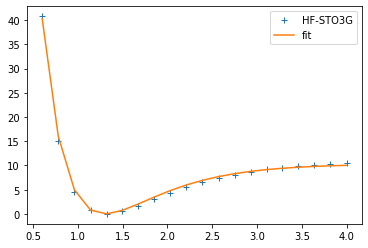

In [7]:
import numpy as np
from scipy.constants import physical_constants as physdict
Ha_to_eV = physdict['Hartree energy in eV'][0]
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def morse(r,DE,alpha,r0):
    """Morse function """
    return DE*(1 - np.exp(-alpha*(r-r0)))**2


data = np.loadtxt("HCl_scan_HFSTO3G.txt")
r = data[:,0]
E = data[:,1]
E = (E - E.min())*Ha_to_eV

coefs, other = curve_fit(morse, r, E)

plt.plot(r,E,'+',label="HF-STO3G")
fit = morse(r, coefs[0], coefs[1], coefs[2])
plt.plot(r,fit,label="fit")
plt.legend()